In [1]:
cd drive/MyDrive/

/content/drive/MyDrive


In [2]:
cd KHDL_IT4930/model/


/content/drive/MyDrive/KHDL_IT4930/model


In [3]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('../dataset/data.csv', error_bad_lines=False, delimiter='\t')
print(data.shape)
data.head()

(41148, 12)


,Unnamed: 0,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,0,Sedan,Tự động,9000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2019,4.480000e+09,Sclass,Mercedes Benz
1,1,Sedan,Tự động,20000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2017,1.155000e+09,Cclass,Mercedes Benz
2,2,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,5.790000e+08,Kona,Hyundai
3,3,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,8.250000e+08,Tucson,Hyundai
4,4,Sedan,Tự động,32000,Xăng,4,Đã sử dụng,Nhập khẩu,2017,5.750000e+09,Panamera,Porsche


In [5]:
data = pd.get_dummies(data, columns=['tinh_trang', 'hang', 'dong_xe', 'xuat_xu', 'kieu_dang', 'nhien_lieu', 'hop_so'])

In [6]:
data

,Unnamed: 0,km_da_di,so_cho_ngoi,nam_sx,gia,tinh_trang_Mới,tinh_trang_Đã sử dụng,hang_Acura,hang_Audi,hang_BMW,hang_Bentley,hang_Cadillac,hang_Chery,hang_Chevrolet,hang_Chrysler,hang_Daewoo,hang_Daihatsu,hang_Dodge,hang_Dongben,hang_Ferrari,hang_Fiat,hang_Ford,hang_Honda,hang_Hyundai,hang_Infiniti,hang_Isuzu,hang_Jaguar,hang_Jeep,hang_Kia,hang_LandRover,hang_Lexus,hang_Lifan,hang_Lincoln,hang_MG,hang_Maserati,hang_Mazda,hang_Mercedes Benz,hang_Mini,hang_Mitsubishi,hang_Nissan,...,dong_xe_X3,dong_xe_X4,dong_xe_X5,dong_xe_X6,dong_xe_X7,dong_xe_XC40,dong_xe_XC60,dong_xe_XC90,dong_xe_XF,dong_xe_XJseries,dong_xe_XL7,dong_xe_XTerra,dong_xe_Xpander,dong_xe_XpanderCross,dong_xe_Xtrail,dong_xe_Yaris,dong_xe_Z4,dong_xe_Z8,dong_xe_ZS,dong_xe_Zace,dong_xe_Zinger,xuat_xu_Lắp ráp trong nước,xuat_xu_Nhập khẩu,kieu_dang_Bán tải / Pickup,kieu_dang_Convertible/Cabriolet,kieu_dang_Coupe,kieu_dang_Hatchback,kieu_dang_Mui trần,kieu_dang_SUV / Cross over,kieu_dang_Sedan,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Tự động
0,0,9000,5,2019,4.480000e+09,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,1,20000,5,2017,1.155000e+09,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,2,0,5,2021,5.790000e+08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,3,0,5,2021,8.250000e+08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,4,32000,4,2017,5.750000e+09,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41143,41143,200000,8,2009,2.800000e+08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
41144,41144,38000,5,2018,5.630000e+08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
41145,41145,70000,5,2009,1.850000e+08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
41146,41146,2555,5,1999,4.250000e+07,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [7]:
from sklearn import preprocessing
norm = preprocessing.StandardScaler()

data[data.columns] = norm.fit_transform(data)
data

,Unnamed: 0,km_da_di,so_cho_ngoi,nam_sx,gia,tinh_trang_Mới,tinh_trang_Đã sử dụng,hang_Acura,hang_Audi,hang_BMW,hang_Bentley,hang_Cadillac,hang_Chery,hang_Chevrolet,hang_Chrysler,hang_Daewoo,hang_Daihatsu,hang_Dodge,hang_Dongben,hang_Ferrari,hang_Fiat,hang_Ford,hang_Honda,hang_Hyundai,hang_Infiniti,hang_Isuzu,hang_Jaguar,hang_Jeep,hang_Kia,hang_LandRover,hang_Lexus,hang_Lifan,hang_Lincoln,hang_MG,hang_Maserati,hang_Mazda,hang_Mercedes Benz,hang_Mini,hang_Mitsubishi,hang_Nissan,...,dong_xe_X3,dong_xe_X4,dong_xe_X5,dong_xe_X6,dong_xe_X7,dong_xe_XC40,dong_xe_XC60,dong_xe_XC90,dong_xe_XF,dong_xe_XJseries,dong_xe_XL7,dong_xe_XTerra,dong_xe_Xpander,dong_xe_XpanderCross,dong_xe_Xtrail,dong_xe_Yaris,dong_xe_Z4,dong_xe_Z8,dong_xe_ZS,dong_xe_Zace,dong_xe_Zinger,xuat_xu_Lắp ráp trong nước,xuat_xu_Nhập khẩu,kieu_dang_Bán tải / Pickup,kieu_dang_Convertible/Cabriolet,kieu_dang_Coupe,kieu_dang_Hatchback,kieu_dang_Mui trần,kieu_dang_SUV / Cross over,kieu_dang_Sedan,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Tự động
0,-1.732009,-0.055320,-0.325260,0.789065,2.358587,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,-0.377061,-0.019096,-0.073651,-0.027898,-0.026557,-0.365578,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,3.358470,-0.033088,-0.212449,-0.117461,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,-0.014791,-0.019096,-0.030403,-0.026095,-0.115425,-0.014791,-0.032343,-0.088948,-0.013945,-0.011024,-0.027898,-0.067567,-0.034880,0.814671,-0.814671,-0.239601,-0.03,-0.067385,-0.389820,-0.018449,-0.670932,1.254208,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
1,-1.731925,-0.050916,-0.325260,0.438161,0.227431,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,-0.377061,-0.019096,-0.073651,-0.027898,-0.026557,-0.365578,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,3.358470,-0.033088,-0.212449,-0.117461,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,-0.014791,-0.019096,-0.030403,-0.026095,-0.115425,-0.014791,-0.032343,-0.088948,-0.013945,-0.011024,-0.027898,-0.067567,-0.034880,0.814671,-0.814671,-0.239601,-0.03,-0.067385,-0.389820,-0.018449,-0.670932,1.254208,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
2,-1.731840,-0.058923,-0.325260,1.139970,-0.141756,3.646564,-3.646564,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,2.652090,-0.019096,-0.073651,-0.027898,-0.026557,-0.365578,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,-0.014791,-0.019096,-0.030403,-0.026095,-0.115425,-0.014791,-0.032343,-0.088948,-0.013945,-0.011024,-0.027898,-0.067567,-0.034880,0.814671,-0.814671,-0.239601,-0.03,-0.067385,-0.389820,-0.018449,1.490464,-0.797316,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
3,-1.731756,-0.058923,-0.325260,1.139970,0.015918,3.646564,-3.646564,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,2.652090,-0.019096,-0.073651,-0.027898,-0.026557,-0.365578,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,-0.014791,-0.0

In [8]:
data.describe()

,Unnamed: 0,km_da_di,so_cho_ngoi,nam_sx,gia,tinh_trang_Mới,tinh_trang_Đã sử dụng,hang_Acura,hang_Audi,hang_BMW,hang_Bentley,hang_Cadillac,hang_Chery,hang_Chevrolet,hang_Chrysler,hang_Daewoo,hang_Daihatsu,hang_Dodge,hang_Dongben,hang_Ferrari,hang_Fiat,hang_Ford,hang_Honda,hang_Hyundai,hang_Infiniti,hang_Isuzu,hang_Jaguar,hang_Jeep,hang_Kia,hang_LandRover,hang_Lexus,hang_Lifan,hang_Lincoln,hang_MG,hang_Maserati,hang_Mazda,hang_Mercedes Benz,hang_Mini,hang_Mitsubishi,hang_Nissan,...,dong_xe_X3,dong_xe_X4,dong_xe_X5,dong_xe_X6,dong_xe_X7,dong_xe_XC40,dong_xe_XC60,dong_xe_XC90,dong_xe_XF,dong_xe_XJseries,dong_xe_XL7,dong_xe_XTerra,dong_xe_Xpander,dong_xe_XpanderCross,dong_xe_Xtrail,dong_xe_Yaris,dong_xe_Z4,dong_xe_Z8,dong_xe_ZS,dong_xe_Zace,dong_xe_Zinger,xuat_xu_Lắp ráp trong nước,xuat_xu_Nhập khẩu,kieu_dang_Bán tải / Pickup,kieu_dang_Convertible/Cabriolet,kieu_dang_Coupe,kieu_dang_Hatchback,kieu_dang_Mui trần,kieu_dang_SUV / Cross over,kieu_dang_Sedan,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Tự động
count,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,...,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04,4.114800e+04
mean,3.926306e-17,-2.327294e-15,-2.039062e-15,-3.101019e-14,1.489727e-16,8.465496e-14,-8.465496e-14,4.810971e-16,4.898398e-15,-4.490192e-15,-1.072542e-15,-5.482362e-15,3.355573e-16,1.803261e-15,1.756117e-15,3.840789e-16,2.346352e-16,-4.772106e-15,9.035629e-16,-3.259432e-15,-4.176962e-17,6.764269e-15,1.172622e-15,-3.509935e-15,-1.221337e-15,-7.455571e-16,-2.207776e-15,1.933311e-15,5.469521e-15,2.013945e-15,-2.965712e-15,1.316407e-15,5.158039e-16,4.768650e-15,-3.584804e-15,4.669132e-15,1.470512e-14,-1.062567e-14,5.360316e-15,6.242246e-16,...,-4.079408e-15,-1.470714e-15,3.824969e-15,3.580682e-15,-2.763394e-15,1.417079e-15,-1.261390e-15,2.100159e-15,8.577413e-16,-1.570366e-15,-4.629892e-17,2.002861e-14,-3.857278e-15,-4.964330e-15,-4.238007e-16,-8.683310e-16,1.055171e-15,1.552460e-15,1.596446e-15,-1.861694e-15,-9.171266e-16,3.101044e-14,-3.101680e-14,-4.581768e-15,-5.564502e-15,-1.226037e-15,-4.316455e-15,-4.021194e-15,-5.596956e-15,9.087273e-17,6.980933e-14,4.143998e-14,-4.931981e-15,-5.229477e-15,3.415104e-15,-3.668147e-15,-5.848247e-15,2.626470e-14,1.581896e-14,1.082193e-14
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.0000

In [9]:
training_set = pd.read_csv('../dataset/train.csv', error_bad_lines=False, delimiter='\t')
print(training_set.shape)
training_set.head()

(26334, 12)


,Unnamed: 0,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,13584,Sedan,Tự động,350000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2020,3.780000e+08,I10,Hyundai
1,16547,SUV / Cross over,Tự động,0,Dầu,7,Mới,Lắp ráp trong nước,2021,1.114000e+09,Sorento,Kia
2,24133,Van/Minivan,Số sàn,200000,Xăng,16,Đã sử dụng,Lắp ráp trong nước,2007,1.980000e+08,Hiace,Toyota
3,33051,Bán tải / Pickup,Số sàn,123456,Dầu,5,Đã sử dụng,Nhập khẩu,2005,1.850000e+08,Ranger,Ford
4,32363,Van/Minivan,Tự động,68000,Xăng,7,Đã sử dụng,Lắp ráp trong nước,2011,3.050000e+08,Carens,Kia


In [10]:
# data['Unnamed: 0' == training_set['Unnamed: 0'].values]
# data.loc[data['Unnamed: 0'] == training_set['Unnamed: 0'].values]

# dfl = pd.DataFrame(np.random.randn(5, 4),
#                    columns=list('ABCD'),
#                    index=pd.date_range('20130101', periods=5))

training_set = pd.DataFrame(data, index=training_set['Unnamed: 0'].values)
training_set.shape

(26334, 392)

In [11]:
val_set = pd.read_csv('../dataset/val.csv', error_bad_lines=False, delimiter='\t')
print(val_set.shape)
val_set.head()

val_set = pd.DataFrame(data, index=val_set['Unnamed: 0'].values)
val_set.shape

(6584, 12)


(6584, 392)

In [12]:
test_set = pd.read_csv('../dataset/test.csv', error_bad_lines=False, delimiter='\t')
print(test_set.shape)
test_set.head()

test_set = pd.DataFrame(data, index=test_set['Unnamed: 0'].values)
test_set.shape
test_set

(8230, 12)


,Unnamed: 0,km_da_di,so_cho_ngoi,nam_sx,gia,tinh_trang_Mới,tinh_trang_Đã sử dụng,hang_Acura,hang_Audi,hang_BMW,hang_Bentley,hang_Cadillac,hang_Chery,hang_Chevrolet,hang_Chrysler,hang_Daewoo,hang_Daihatsu,hang_Dodge,hang_Dongben,hang_Ferrari,hang_Fiat,hang_Ford,hang_Honda,hang_Hyundai,hang_Infiniti,hang_Isuzu,hang_Jaguar,hang_Jeep,hang_Kia,hang_LandRover,hang_Lexus,hang_Lifan,hang_Lincoln,hang_MG,hang_Maserati,hang_Mazda,hang_Mercedes Benz,hang_Mini,hang_Mitsubishi,hang_Nissan,...,dong_xe_X3,dong_xe_X4,dong_xe_X5,dong_xe_X6,dong_xe_X7,dong_xe_XC40,dong_xe_XC60,dong_xe_XC90,dong_xe_XF,dong_xe_XJseries,dong_xe_XL7,dong_xe_XTerra,dong_xe_Xpander,dong_xe_XpanderCross,dong_xe_Xtrail,dong_xe_Yaris,dong_xe_Z4,dong_xe_Z8,dong_xe_ZS,dong_xe_Zace,dong_xe_Zinger,xuat_xu_Lắp ráp trong nước,xuat_xu_Nhập khẩu,kieu_dang_Bán tải / Pickup,kieu_dang_Convertible/Cabriolet,kieu_dang_Coupe,kieu_dang_Hatchback,kieu_dang_Mui trần,kieu_dang_SUV / Cross over,kieu_dang_Sedan,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Tự động
20375,-0.016711,0.017917,1.031024,-1.140908,-0.333399,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,-0.377061,-0.019096,-0.073651,-0.027898,-0.026557,-0.365578,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,-0.014791,-0.019096,-0.030403,-0.026095,-0.115425,-0.014791,-0.032343,-0.088948,-0.013945,-0.011024,-0.027898,-0.067567,-0.03488,0.814671,-0.814671,-0.239601,-0.03,-0.067385,-0.389820,-0.018449,1.490464,-0.797316,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822
7195,-1.126288,-0.018886,0.578929,0.438161,-0.016130,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,-0.377061,-0.019096,-0.073651,-0.027898,-0.026557,2.735393,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,-0.014791,-0.019096,-0.030403,-0.026095,-0.115425,-0.014791,-0.032343,-0.088948,-0.013945,-0.011024,-0.027898,-0.067567,-0.03488,0.814671,-0.814671,-0.239601,-0.03,-0.067385,-0.389820,-0.018449,-0.670932,-0.797316,-0.147055,3.227096,-0.013945,2.32580,-0.056514,-2.296831,-0.012076,-0.060891,-0.735415,0.741387
14914,-0.476453,-0.018886,-0.325260,0.262709,-0.391726,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,2.652090,-0.019096,-0.073651,-0.027898,-0.026557,-0.365578,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,-0.014791,-0.019096,-0.030403,-0.026095,-0.115425,-0.014791,-0.032343,-0.088948,-0.013945,-0.011024,-0.027898,-0.067567,-0.03488,-1.227490,1.227490,-0.239601,-0.03,-0.067385,2.565286,-0.018449,-0.670932,-0.797316,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822
18560,-0.169509,-0.033086,-0.325260,0.789065,-0.152652,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,2.652090,-0.019096,-0.073651,-0.027898,-0.026557,-0.365578,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,

In [13]:
train_set = pd.concat([training_set, val_set])

In [14]:
test_set

,Unnamed: 0,km_da_di,so_cho_ngoi,nam_sx,gia,tinh_trang_Mới,tinh_trang_Đã sử dụng,hang_Acura,hang_Audi,hang_BMW,hang_Bentley,hang_Cadillac,hang_Chery,hang_Chevrolet,hang_Chrysler,hang_Daewoo,hang_Daihatsu,hang_Dodge,hang_Dongben,hang_Ferrari,hang_Fiat,hang_Ford,hang_Honda,hang_Hyundai,hang_Infiniti,hang_Isuzu,hang_Jaguar,hang_Jeep,hang_Kia,hang_LandRover,hang_Lexus,hang_Lifan,hang_Lincoln,hang_MG,hang_Maserati,hang_Mazda,hang_Mercedes Benz,hang_Mini,hang_Mitsubishi,hang_Nissan,...,dong_xe_X3,dong_xe_X4,dong_xe_X5,dong_xe_X6,dong_xe_X7,dong_xe_XC40,dong_xe_XC60,dong_xe_XC90,dong_xe_XF,dong_xe_XJseries,dong_xe_XL7,dong_xe_XTerra,dong_xe_Xpander,dong_xe_XpanderCross,dong_xe_Xtrail,dong_xe_Yaris,dong_xe_Z4,dong_xe_Z8,dong_xe_ZS,dong_xe_Zace,dong_xe_Zinger,xuat_xu_Lắp ráp trong nước,xuat_xu_Nhập khẩu,kieu_dang_Bán tải / Pickup,kieu_dang_Convertible/Cabriolet,kieu_dang_Coupe,kieu_dang_Hatchback,kieu_dang_Mui trần,kieu_dang_SUV / Cross over,kieu_dang_Sedan,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Tự động
20375,-0.016711,0.017917,1.031024,-1.140908,-0.333399,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,-0.377061,-0.019096,-0.073651,-0.027898,-0.026557,-0.365578,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,-0.014791,-0.019096,-0.030403,-0.026095,-0.115425,-0.014791,-0.032343,-0.088948,-0.013945,-0.011024,-0.027898,-0.067567,-0.03488,0.814671,-0.814671,-0.239601,-0.03,-0.067385,-0.389820,-0.018449,1.490464,-0.797316,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822
7195,-1.126288,-0.018886,0.578929,0.438161,-0.016130,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,-0.377061,-0.019096,-0.073651,-0.027898,-0.026557,2.735393,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,-0.014791,-0.019096,-0.030403,-0.026095,-0.115425,-0.014791,-0.032343,-0.088948,-0.013945,-0.011024,-0.027898,-0.067567,-0.03488,0.814671,-0.814671,-0.239601,-0.03,-0.067385,-0.389820,-0.018449,-0.670932,-0.797316,-0.147055,3.227096,-0.013945,2.32580,-0.056514,-2.296831,-0.012076,-0.060891,-0.735415,0.741387
14914,-0.476453,-0.018886,-0.325260,0.262709,-0.391726,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,2.652090,-0.019096,-0.073651,-0.027898,-0.026557,-0.365578,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,-0.014791,-0.019096,-0.030403,-0.026095,-0.115425,-0.014791,-0.032343,-0.088948,-0.013945,-0.011024,-0.027898,-0.067567,-0.03488,-1.227490,1.227490,-0.239601,-0.03,-0.067385,2.565286,-0.018449,-0.670932,-0.797316,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822
18560,-0.169509,-0.033086,-0.325260,0.789065,-0.152652,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,2.652090,-0.019096,-0.073651,-0.027898,-0.026557,-0.365578,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,

In [15]:
del train_set['Unnamed: 0']
del test_set['Unnamed: 0']

In [16]:
test_set

,km_da_di,so_cho_ngoi,nam_sx,gia,tinh_trang_Mới,tinh_trang_Đã sử dụng,hang_Acura,hang_Audi,hang_BMW,hang_Bentley,hang_Cadillac,hang_Chery,hang_Chevrolet,hang_Chrysler,hang_Daewoo,hang_Daihatsu,hang_Dodge,hang_Dongben,hang_Ferrari,hang_Fiat,hang_Ford,hang_Honda,hang_Hyundai,hang_Infiniti,hang_Isuzu,hang_Jaguar,hang_Jeep,hang_Kia,hang_LandRover,hang_Lexus,hang_Lifan,hang_Lincoln,hang_MG,hang_Maserati,hang_Mazda,hang_Mercedes Benz,hang_Mini,hang_Mitsubishi,hang_Nissan,hang_Peugeot,...,dong_xe_X3,dong_xe_X4,dong_xe_X5,dong_xe_X6,dong_xe_X7,dong_xe_XC40,dong_xe_XC60,dong_xe_XC90,dong_xe_XF,dong_xe_XJseries,dong_xe_XL7,dong_xe_XTerra,dong_xe_Xpander,dong_xe_XpanderCross,dong_xe_Xtrail,dong_xe_Yaris,dong_xe_Z4,dong_xe_Z8,dong_xe_ZS,dong_xe_Zace,dong_xe_Zinger,xuat_xu_Lắp ráp trong nước,xuat_xu_Nhập khẩu,kieu_dang_Bán tải / Pickup,kieu_dang_Convertible/Cabriolet,kieu_dang_Coupe,kieu_dang_Hatchback,kieu_dang_Mui trần,kieu_dang_SUV / Cross over,kieu_dang_Sedan,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Tự động
20375,0.017917,1.031024,-1.140908,-0.333399,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,-0.377061,-0.019096,-0.073651,-0.027898,-0.026557,-0.365578,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,-0.058429,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,-0.014791,-0.019096,-0.030403,-0.026095,-0.115425,-0.014791,-0.032343,-0.088948,-0.013945,-0.011024,-0.027898,-0.067567,-0.03488,0.814671,-0.814671,-0.239601,-0.03,-0.067385,-0.389820,-0.018449,1.490464,-0.797316,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822
7195,-0.018886,0.578929,0.438161,-0.016130,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,-0.377061,-0.019096,-0.073651,-0.027898,-0.026557,2.735393,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,-0.058429,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,-0.014791,-0.019096,-0.030403,-0.026095,-0.115425,-0.014791,-0.032343,-0.088948,-0.013945,-0.011024,-0.027898,-0.067567,-0.03488,0.814671,-0.814671,-0.239601,-0.03,-0.067385,-0.389820,-0.018449,-0.670932,-0.797316,-0.147055,3.227096,-0.013945,2.32580,-0.056514,-2.296831,-0.012076,-0.060891,-0.735415,0.741387
14914,-0.018886,-0.325260,0.262709,-0.391726,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,2.652090,-0.019096,-0.073651,-0.027898,-0.026557,-0.365578,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,-0.058429,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.025145,-0.014791,-0.019096,-0.030403,-0.026095,-0.115425,-0.014791,-0.032343,-0.088948,-0.013945,-0.011024,-0.027898,-0.067567,-0.03488,-1.227490,1.227490,-0.239601,-0.03,-0.067385,2.565286,-0.018449,-0.670932,-0.797316,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822
18560,-0.033086,-0.325260,0.789065,-0.152652,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,-0.027011,-0.016352,-0.20114,-0.015591,-0.168345,-0.028331,-0.012076,-0.023649,-0.012076,-0.035227,-0.324221,-0.213882,2.652090,-0.019096,-0.073651,-0.027898,-0.026557,-0.365578,-0.099328,-0.137269,-0.011024,-0.017777,-0.036585,-0.025145,-0.269955,-0.297755,-0.033088,-0.212449,-0.117461,-0.058429,...,-0.025624,-0.018449,-0.040385,-0.033816,-0.018449,-0.011024,-0.014791,-0.02514

In [17]:
# Univariate model
def knn_train_test_uni(feature, target_column, train_set, test_set, k):
    
    # Train
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[[feature]], train_set[target_column])
    
    # Predict
    predictions = knn.predict(test_set[[feature]])
    
    # Calculate MSE
    mse = mean_squared_error(test_set[target_column], predictions)
    
    return mse

In [18]:
k_values = [5]
mse_uni = {}
current_mse = []
target_column = 'gia'

continuous_numeric = ['km_da_di', 'so_cho_ngoi', 'nam_sx', 'gia']

for feature in continuous_numeric[0:-1]:
    for k in k_values:
        current_mse.append(knn_train_test_uni(feature, target_column, train_set, test_set, k))
        
    mse_uni[feature] = current_mse
    current_mse = []

mse_uni

{'km_da_di': [1.225926098062694],
 'nam_sx': [1.2586126468960321],
 'so_cho_ngoi': [1.1822369765629297]}

In [19]:
avg_mse = {}

for key, values in mse_uni.items():
    avg_mse[key] = np.mean(values)

avg_mse = pd.Series(avg_mse)
avg_mse.sort_values()

so_cho_ngoi    1.182237
km_da_di       1.225926
nam_sx         1.258613
dtype: float64

In [20]:
# Multivariate model
def knn_train_test(features, target_column, train_set, test_set, k):
    # Train
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[features], train_set[target_column])
    
    # Predict
    predictions = knn.predict(test_set[features])
    
    # Calculate MSE
    mse = mean_squared_error(test_set[target_column], predictions)
    
    return mse

In [21]:
columns = train_set.columns

import re


categories = ['kieu_dang', 'hop_so', 'nhien_lieu', 'tinh_trang', 'xuat_xu', 'dong_xe', 'hang']
total = []

for c in categories:
  p = re.compile(c)
  lis = [ s for s in columns if p.match(s)]
  total.append(lis)

total

[['kieu_dang_Bán tải / Pickup',
  'kieu_dang_Convertible/Cabriolet',
  'kieu_dang_Coupe',
  'kieu_dang_Hatchback',
  'kieu_dang_Mui trần',
  'kieu_dang_SUV / Cross over',
  'kieu_dang_Sedan',
  'kieu_dang_Truck',
  'kieu_dang_Van/Minivan',
  'kieu_dang_Wagon'],
 ['hop_so_Bán tự động', 'hop_so_Số sàn', 'hop_so_Tự động'],
 ['nhien_lieu_Dầu', 'nhien_lieu_Hybrid', 'nhien_lieu_Xăng', 'nhien_lieu_Điện'],
 ['tinh_trang_Mới', 'tinh_trang_Đã sử dụng'],
 ['xuat_xu_Lắp ráp trong nước', 'xuat_xu_Nhập khẩu'],
 ['dong_xe_190',
  'dong_xe_1Series',
  'dong_xe_2',
  'dong_xe_2008',
  'dong_xe_208',
  'dong_xe_2Series',
  'dong_xe_3',
  'dong_xe_3008',
  'dong_xe_300C',
  'dong_xe_323',
  'dong_xe_3Series',
  'dong_xe_4Runner',
  'dong_xe_4Series',
  'dong_xe_5',
  'dong_xe_500',
  'dong_xe_5008',
  'dong_xe_508',
  'dong_xe_520',
  'dong_xe_5Series',
  'dong_xe_6',
  'dong_xe_626',
  'dong_xe_718',
  'dong_xe_7Series',
  'dong_xe_911',
  'dong_xe_A1',
  'dong_xe_A2',
  'dong_xe_A3',
  'dong_xe_A4',


In [22]:
features = {
        'kieu_dang': total[0],
        'hop_so': total[1],
        'nhien_lieu': total[2],
        'tinh_trang': total[3],
        'xuat_xu': total[4],
        'dong_xe': total[5],
        'hang': total[6],
    } 

mse_uti_onehot = {}
target_column = 'gia'
k = 5

for key, value in features.items():
    mse_uti_onehot[key] = knn_train_test(value, target_column, train_set, test_set, k)
    
pd.Series(mse_uti_onehot).sort_values()

dong_xe       0.393873
hang          0.576566
hop_so        1.211014
tinh_trang    1.237447
kieu_dang     1.238491
nhien_lieu    1.336713
xuat_xu       1.384758
dtype: float64

In [23]:
train_set.columns

Index(['km_da_di', 'so_cho_ngoi', 'nam_sx', 'gia', 'tinh_trang_Mới',
       'tinh_trang_Đã sử dụng', 'hang_Acura', 'hang_Audi', 'hang_BMW',
       'hang_Bentley',
       ...
       'kieu_dang_Truck', 'kieu_dang_Van/Minivan', 'kieu_dang_Wagon',
       'nhien_lieu_Dầu', 'nhien_lieu_Hybrid', 'nhien_lieu_Xăng',
       'nhien_lieu_Điện', 'hop_so_Bán tự động', 'hop_so_Số sàn',
       'hop_so_Tự động'],
      dtype='object', length=391)

In [24]:
list_feature_no_price = [i for i in train_set.columns if i != 'gia']

In [25]:
top_6_feature = [i for i in list_feature_no_price if 'dong_xe' in i or 'hang' in i or 'hop_so' in i or 'km_da_di' in i or 'so_cho_ngoi' in i or 'nam_sx' in i]

In [26]:
# chọn 2 model tốt nhất  ở bên trên để hyperparameter turning k

top_models = {
  'best_2': list_feature_no_price, # tat ca du lieu, 
  'best_3': top_6_feature
}

k_values = list(range(1, 26))
mse_multi_k = {}
mse_current = []

for key, value in top_models.items():
    for k in k_values:
        mse_current.append(knn_train_test(value, target_column, train_set, test_set, k))
        
    mse_multi_k[key] = mse_current
    mse_current = []
    
print(mse_multi_k)

{'best_2': [0.15656762961359671, 0.16288404630858166, 0.17322513130428177, 0.17920161385937539, 0.21703523528366359, 0.2531997004311702, 0.2851678553932433, 0.31259114278396166, 0.33731662795455614, 0.35818207358475423, 0.3784224403254033, 0.39663335486009604, 0.4122995726840326, 0.4274404363194668, 0.44144774074411053, 0.45456173552577644, 0.46704114576582356, 0.4790324417364049, 0.49050937412986106, 0.5006742680401894, 0.5102215697764609, 0.5199285938350073, 0.5296401891850212, 0.5387047576478747, 0.5476619499548272], 'best_3': [0.13768378689253352, 0.15757325746401143, 0.1714853242627479, 0.1723087055231589, 0.21191453518399794, 0.248764891529631, 0.2822451202840201, 0.31237027065378464, 0.3366541757803282, 0.3585190033380724, 0.3792364242241196, 0.39522877798742595, 0.41159238691159644, 0.4267073713506293, 0.44148828264633433, 0.45505349047386934, 0.4674193161375615, 0.47853574739928095, 0.49000443460164483, 0.5005860943560304, 0.5103759535456398, 0.5202282157640626, 0.529327276647

In [27]:
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


{'best_2': [0.15656762961359671, 1], 'best_3': [0.13768378689253352, 1]}


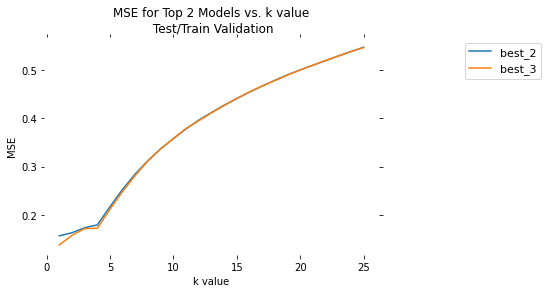

In [28]:
# Returns a dict with the min value of every key's list and its index the list
def min_key_value(dictionary):
    min_values = {}
    for k, v in dictionary.items():
        min_values[k] = [min(v), v.index(min(v))+1]
        
    return min_values
        
best_k = min_key_value(mse_multi_k)
print(best_k)

# Plot results
fig, ax = plt.subplots(1)

for key, values in mse_multi_k.items():
    ax.plot(k_values, values, label=key)
    ax.set_xlabel('k value')
    ax.set_ylabel('MSE')
    ax.set_title('MSE for Top 2 Models vs. k value\n Test/Train Validation')
    ax.tick_params(top="off", left="off", right="off", bottom='off')
    ax.legend(bbox_to_anchor=(1.5, 1), prop={'size': 11})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

In [29]:
def predict(features, target_column, train_set, test_set, k):
    # Train
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[features], train_set[target_column])
    
    # Predict
    predictions = knn.predict(test_set[features])
    
    # Calculate MSE
    return predictions

In [35]:
predictions = predict(top_models['best_2'], 'gia', train_set, test_set, 1)

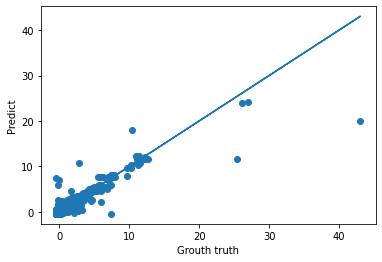

In [36]:
plt.scatter(test_set.gia,predictions)
plt.xlabel("Grouth truth")
plt.ylabel("Predict")
plt.plot([i for i in test_set.gia], [i for i in test_set.gia])
plt.show()


In [32]:
predictions = predict(top_models['best_3'], 'gia', train_set, test_set, 1)

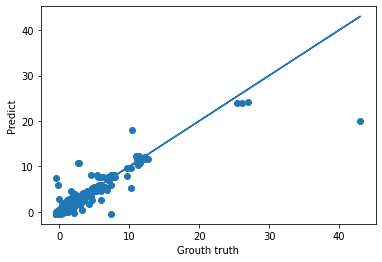

In [34]:
plt.scatter(test_set.gia,predictions)
plt.xlabel("Grouth truth")
plt.ylabel("Predict")
plt.plot([i for i in test_set.gia], [i for i in test_set.gia])
plt.show()